# Método de Newton
1. Dado $x_0 \in Dom f$, determine la ecuacion de la recta tangente a f que pasa por ($x_0$, f($x_0$))
2. Encuentre la raíz de la recta tangente


##Definición
Se trata de un algoritmo para encontrar las raíces de una función real. También puede ser usado para encontrar el máximo o mínimo de una función. Fue escrito por Isaac Newton en 1669 y publicado en 1711 por William Jones. El método, no tiene garantizado su convergencia global; es decir, no funciona para toda función real y no menos importante, sólo trabaja para funciones de una sola variable y en particular con polinomios. 

¿Cómo funciona?, se trata de dada una función real $f(x)$ (en particular polinomio), hallaremos una recta tangente a la función en un punto $(x_0,f(x_0))$, a partir de la ecuación de la recta (punto-pendiente). Luego; a esta recta, encontramos el punto de corte con el eje x y a este valor le hallamos $x_1$ y su respectivo $(x_1,f(x_1))$. Así; sucesivamente hasta un $(x_n,f(x_n))$, en donde este punto será la aproximación más cercana a la raíz de la función y a cada $x_n$ le llamamos "interaciones" y gráficamente lo podemos ver como:

![Imagen](https://siqueiresaprenderingenieria.files.wordpress.com/2014/05/800px-newton_iteration.png)

##Demostración
1. Queremos determinar la ecuación de la recta tangente que pasa por $(x,f(x))$. Para esto, sabemos que $m_t=f'(x_0)$ en un punto $(x_0,f(x_0))$. Ahora, utilizamos la ecuación de la recta (punto-pendiente): $m_t = \frac{y - y_0}{x-x_0}$. Pero como $m_t=f'(x_0)$ y $f(x_0)=y_0$, entonces reemplazando tendremos que: $f'(x_0) = \frac{y - f(x_0)}{x-x_0}$. De este modo; despejando "y":  $y = f'(x_0)x-x_0f'(x_0)+f(x_0)$, deducimos la ecuación de la recta tangente a un punto dado "$x_0$" en una funcion $f(x)$ en términos generales.


2. Finalmente; deducimos la raíz de esta recta con el eje x, igualando la ecuación a cero o en otras palabras, calculando $f(x)=0$ y despejando $x$: $0 = f'(x_0)x-x_0f'(x_0)+f(x_0)$; luego, $x = \frac{x_0f'(x_0)-f(x_0)}{f'(x_0)}$ y simplificando: $x = x_0 - \frac{f(x_0)}{f'(x_0)}$, en donde "x" será el nuevo $x_1, x_2,...,x_n$ como queríamos demostrar.

##Código
Como punto extra, intentaremos encontrar la raíz de una función para las primeras 3 interaciones por medio de código. Utilizando incialmente un paquete de programación llamado "sympy" y "numpy" para conceptos matematicos como las funciones y derivadas. Luego, agregamos una variable, la función y su derivada. Ahora, con el uso del "$for$" realizaremos el ciclo para encontrar las primeras 3 interaciones (por el momento), encontrando $f(a)$ y $f'(a)$, luego utilizamos la fórmula ya intuida y demostrada. Y finalmente lo gráficaremos para ayudarnos a visualizar qué función se está tratando. 

[1.50000000000000, 1.34782608695652, 1.32520039895091, 1.32471817399905, 1.32471795724479, 1.32471795724475, 1.32471795724475, 1.32471795724475, 1.32471795724475, 1.32471795724475]


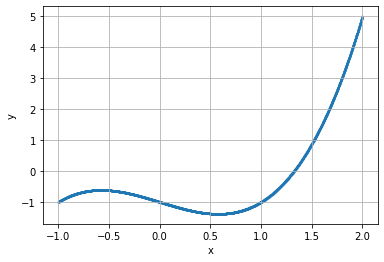

In [ ]:
import sympy as spp
import numpy as np
import matplotlib.pyplot as plt

x = spp.symbols('x')
funcion  = x**3-x-1
derivada = spp.diff(funcion)
x0=1
A = []              
for i in range(10) :
  a = spp.sympify(funcion).subs(x,x0)
  b = spp.sympify(derivada).subs(x,x0)
  x0 = x0 - spp.N(a/b)
  A.append(x0)
print(A)


q = np.arange(-1,2,0.001)
w = q**3-q-1
plt.scatter(q,w,1)
plt.xlabel(r"x")
plt.ylabel(r"y")
plt.grid()

# Siendo A, una lista con los resultados de las interaciones

In [ ]:
import sympy as spp
import numpy as np
import math as math

x = spp.symbols('x')
funcion  = x**2+(x+3)**2-9
derivada = spp.diff(funcion)
x0=1
A = []              
for i in range(5) :
  a = spp.sympify(funcion).subs(x,x0)
  b = spp.sympify(derivada).subs(x,x0)
  x0 = x0 - spp.N(a/b)
  A.append(x0)
print(A)

[0.200000000000000, 0.0117647058823527, 4.57770656901689e-5, 6.98492011409410e-10, 8.07730618501701e-17]


In [ ]:
import sympy as spp
import numpy as np

x = spp.symbols('x')
funcion  = x+3
derivada = spp.diff(funcion)
x0=1
A = []              
for i in range(10) :
  a = spp.sympify(funcion).subs(x,x0)
  b = spp.sympify(derivada).subs(x,x0)
  x0 = x0 - spp.N(a/b)
  A.append(x0)
print(A)
print(spp.sympify(derivada).subs(x,A))

[-3.00000000000000, -3.00000000000000, -3.00000000000000, -3.00000000000000, -3.00000000000000, -3.00000000000000, -3.00000000000000, -3.00000000000000, -3.00000000000000, -3.00000000000000]
1


##Conclusión

Observamos entonces que para la función "$x^3-x-1$" tiene como raíz el número $\frac{71749}{54142}$; es decir, 1.3. Obtenido en la tercera interacion y desde $x_0=1$. De este modo, podemos encontrar la raíz de cualquier función real (de polinomios) con una precisión de un décimal, como también podemos comprobar la raíz en la gráfica de la función dada.

# Método de Bisección (punto medio)

## Algoritmo
Entrada: 
1. f es una funcion continua
2. a y b $\in Dom f$, tal que $f(a)f(b)<0$
3. tol = error, que expresa que tan lejos está la raíz aproximada a la real.
4. Buscar el punto medio entre a y b:
    
  Proceso:
```
mientras Error>tol
x = (a+b) /2
Si f(a)f(b)<0 :
  a=a
  b=x
Si f(a)f(b)>0 :
  a=x
  b=b
Si f(a)f(b)=0 :
  x es raíz de f(x)
Error = |b-a|
Salida x
La raíz de la ecuación, será: x+-E
```

Teniendo en cuenta que es una sucesion que tiende a la raíz de la función: $a,b,x_1,x_2, ... , x_n$



## Código

In [ ]:
import sympy as spp
import numpy as np
from sympy.parsing.sympy_parser import parse_expr

x = spp.symbols('x')
funcion = x**2+3*x
a0 = -4
b0 = -1
for i in range(10) :
  fa0 = spp.sympify(funcion).subs(x,a0)
  fb0 = spp.sympify(funcion).subs(x,b0)
  c = (a0+b0)/2
  fc = spp.sympify(funcion).subs(x,c)
  if fc*fa0<0:
    a0=a0
    b0=c
    print("1er caso, ", spp.N(c))
  elif fc*fb0<0 :
    b0=b0
    a0=c
    print("2er caso, ", spp.N(c))

1er caso,  -2.50000000000000
2er caso,  -3.25000000000000
1er caso,  -2.87500000000000
2er caso,  -3.06250000000000
1er caso,  -2.96875000000000
2er caso,  -3.01562500000000
1er caso,  -2.99218750000000
2er caso,  -3.00390625000000
1er caso,  -2.99804687500000
2er caso,  -3.00097656250000


# Método de Regula Falsi



## Definición

Como en el método de bisección, se parte de un intervalo inicial $[a_0,b_0]$ con $f(a_0)$ y $f(b_0)$ de signos opuestos, lo que garantiza que en su interior hay al menos una raíz. El algoritmo va obteniendo sucesivamente en cada paso un intervalo más pequeño $[a_n, b_n]$, que sigue incluyendo la raíz de la función f y con su aproximación. Ahora, a partir de un intervalo $[a_n, b_n]$ se calcula un punto interior $c_0$, como:

$c_0 = \frac{f(b_0)a_0-f(a_0)b_0}{f(b_0)-f(a_0)}$

Dicho punto es la intersección de la recta que pasa por $(a_0,f(a_0))$ y $(b_0,f(b_0))$. Se evalúa entonces $f(c_0)$. Si es suficientemente pequeño, $c_0$ es la aproximación de la raíz buscada. Si no, el próximo intervalo $(a_0+1, b_0+1)$ será:

1. $[a_0, c_0]$ si $f(a_0)$ y $f(c_0)$ tienen signos opuestos;
2. $[c_0, b_0]$ en caso contrario.

## Código

2do caso,  5.35714285714286
2do caso,  3.44036697247706
2do caso,  2.40693196405648
2do caso,  1.76920173617664
2do caso,  1.34239239382571
2do caso,  1.04102354545414
2do caso,  0.820090009580401
2do caso,  0.653628656262748
2do caso,  0.525604429283495
2do caso,  0.425576745382194


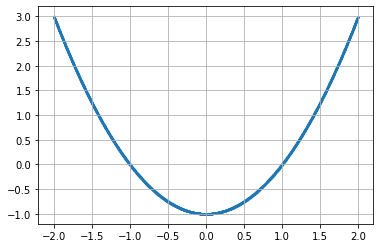

In [ ]:
import sympy as spp
import numpy as np
import matplotlib.pyplot as plt

x = spp.symbols('x')
funcion = (x+3)**2-(9-x**2)
a0 = 10
b0 = 15
for i in range(10) :
  fa = spp.sympify(funcion).subs(x,a0)
  fb = spp.sympify(funcion).subs(x,b0)
  c = (fb*a0-fa*b0)/(fb-fa)
  fc = spp.sympify(funcion).subs(x,c)
  if fc>0 and fc*fa<0 : #1ER CASO
    a0=a0
    b0=c
    print("1er caso, ", spp.N(c))
  elif fc>0 and fc*fa>0 : #2DO CASO
    b0=b0
    a0=c
    print("2do caso, ", spp.N(c))
  elif fc<0 and fc*fa>0 : #3ER CASO
    a0=c
    b0=b0
    print("3er caso, ", spp.N(c))


q = np.arange(-2,2,0.001)
w = q**2-1
plt.scatter(q,w,1)
plt.grid()

## Conclusión

Comprobamos que este método, es muy preciso para pocas interaciones, al igual que el código, y además funciona para cualquier función continua. Ahora; hablando del código, podemos observar que sólo es efectivo para funciones crecientes y, con intervalos, $(a_0,b_0)$, en donde la raíz de la función se encuentre dentro.

# Método de la Secante

## Definición
El método de la secante se puede pensar como una simplificación del método de Newton-Raphson.
En lugar de tomar la derivada de la función cuya raíz se quiere encontrar, se aproxima por una recta
secante (de ahí el nombre) a la curva, cuya pendiente es aproximadamente igual a la derivada en el
punto inicial. La principal diferencia con el método anterior es conocer dos puntos del a función para
poder generar dicha recta. Sean $x0$ y $x1$ pertenecientes a cierta $f(x)$ se puede definir:

$f'(x)\approx \frac{\Delta y}{\Delta x}=\frac{f(x_1)-f(x_0)}{x_1-x_0}$

Luego, reemplazando en el método de Newton-Raphson:
$x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}$

$x_{n+1}=x_n-f(x_n)*\frac{x_n-x_{n-1}}{f(x_n)-f(x_{n-1})}$

## Código

In [ ]:
import numpy as  np
import sympy as  spp
from sympy import Symbol                             
from sympy.parsing.sympy_parser import parse_expr

def secante():
  x=Symbol('x') 
print ("Método de la secante:")
x=Symbol('x') 
f=input("Cuál es su función:")
f=parse_expr(f)
x1=input('Introduce el valor de inicio x1: ')
x1=parse_expr(x1)
x0=input('Introduce el valor de inicio x0: ')
x0=parse_expr(x0)
fx1= spp.sympify(f).subs(x,x1)
fx0= spp.sympify(f).subs(x,x0)
tol=0.001
raiz=[]
raiz.insert(0,0)
i=0
error=1
while abs(error) >  tol:
    x2 = x1 - (fx1*(x1-x0))/(fx1-fx0)
    raiz.append(x2)
    x0 = x1
    x1 = x2
    i=i+1
    error=(raiz[i]-raiz[i-1])/raiz[i]
    print ("Solución aproximada:{: .4f}",spp.N (x0))



Método de la secante:
Cuál es su función:x**2-1
Introduce el valor de inicio x1: 0
Introduce el valor de inicio x0: 4
Solución aproximada:{: .4f} 0
Solución aproximada:{: .4f} 0.250000000000000
Solución aproximada:{: .4f} 0.234375000000000
Solución aproximada:{: .4f} 0.235351562500000


In [ ]:
A=([0.5],[0.25],[0.125],[0.0625],[0.03125],[0.015625],[0.0078125],[0.00390625],[0.001953125],[0.0009765625])
print(A*(1/-3))

TypeError: ignored

In [ ]:
import numpy as np
import sympy as spp
from sympy.parsing.sympy_parser import parse_expr

x,y,h,k = spp.symbols('x y h k')
n = input("Ingrese el valor h de f(x): "); n = parse_expr (n)
m = input("Ingrese el valor k de g(x): "); m = parse_expr (m)
o = input("f(x): "); o = parse_expr (o)
p = input("g(x): "); p = parse_expr (p)
f = o-n
g = p-m
x0 = input("Ingrese el valor inicial x0: "); x0 = parse_expr (x0)
y0 = input("Ingrese el valor incial y0: "); y0 = parse_expr (y0)

for i in range(10) :
  dfx = spp.diff(f,x); dfy = spp.diff(f,y)
  dgx = spp.diff(g,x); dgy = spp.diff(g,y)
  a=dfx.subs(x,x0); b=dfy.subs(y,y0)
  c=dgx.subs(x,x0); d=dgy.subs(y,y0)

  A = spp.Matrix([[a,b],[c,d]])
  dA = A.det()

  u0 = f.subs(x,x0); u = u0.subs(y,y0)
  v0 = g.subs(x,x0); v = v0.subs(y,y0)
  x0 = x0 - (u*d-v*b)/dA
  y0 = y0 - (v*a-u*c)/dA
  print("La solución más cercana al punto x0,y0 es: ", spp.N(x0), spp.N(y0))

Ingrese el valor h de f(x): 9
Ingrese el valor k de g(x): 3
f(x): x**2+y**2
g(x): y-x
Ingrese el valor inicial x0: 2
Ingrese el valor incial y0: 1
La solución más cercana al punto x0,y0 es:  1.33333333333333 4.33333333333333
La solución más cercana al punto x0,y0 es:  0.313725490196078 3.31372549019608
La solución más cercana al punto x0,y0 es:  0.0271330153683095 3.02713301536831
La solución más cercana al punto x0,y0 es:  0.000241040078227686 3.00024104007823
La solución más cercana al punto x0,y0 es:  1.93636614916825e-8 3.00000001936366
La solución más cercana al punto x0,y0 es:  1.24983793841394e-16 3.00000000000000
La solución más cercana al punto x0,y0 es:  5.20698290766265e-33 3.00000000000000
La solución más cercana al punto x0,y0 es:  9.03755700023033e-66 3.00000000000000
La solución más cercana al punto x0,y0 es:  2.72258121774708e-131 3.00000000000000
La solución más cercana al punto x0,y0 es:  2.47081616240972e-262 3.00000000000000
